In [ ]:
'''
simple example of plotting animations.
difficult to get animations working live in browser so plotting animation to video file instead.
had to install install ffmpeg on server for this.
sudo su root
#NB: sudo apg-get update & apt-get install ffmpeg
apg-get update
apt-get install ffmpeg
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import base64
from IPython.display import HTML

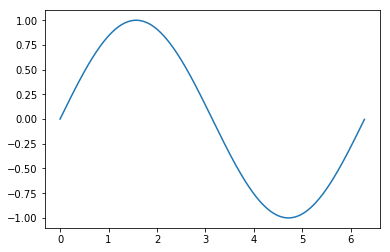

In [3]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

In [4]:
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init, interval=25, blit=True)
#plt.show()
print ("saving file")
ani.save('basic_animation--.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
print ("file saved")
with open('basic_animation--.mp4', 'rb') as f:
    video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(base64.b64encode(f.read()).decode('utf-8'))


saving file
file saved


In [5]:
HTML(video_tag)